Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/30
18/18 [==============================] - 2s 91ms/step - loss: 15.9403 - accuracy: 0.4146 - val_loss: 1.1024 - val_accuracy: 0.0000e+00
Epoch 2/30
18/18 [==============================] - 1s 81ms/step - loss: 1.0904 - accuracy: 0.4578 - val_loss: 1.1743 - val_accuracy: 0.0000e+00
Epoch 3/30
18/18 [==============================] - 1s 81ms/step - loss: 0.9988 - accuracy: 0.5066 - val_loss: 1.3355 - val_accuracy: 0.0000e+00
Epoch 4/30
18/18 [==============================] - 1s 81ms/step - loss: 0.9585 - accuracy: 0.5291 - val_loss: 1.5011 - val_accuracy: 0.0000e+00
Epoch 5/30
18/18 [==============================] - 1s 81ms/step - loss: 0.8790 - accuracy: 0.6004 - val_loss: 1.5732 - val_accuracy: 0.0281
Epoch 6/30
4/4 [==============================] - 0s 18ms/step - loss: 1.1054 - accuracy: 0.4561

 Test accuracy: 0.45614033937454224.


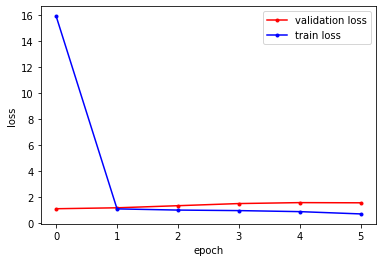

4/4 [==============================] - 0s 18ms/step
[[23 13  2]
 [11 24  3]
 [13 20  5]]


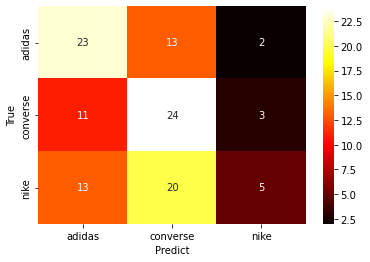

In [ ]:
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from sklearn.metrics import confusion_matrix 

import google.colab.drive as drive 
import os 
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

drive.mount('/content/drive') 

trains_dir = './drive/MyDrive/Colab Notebooks/data/hw5_dataset/train' 
tests_dir = './drive/MyDrive/Colab Notebooks/data/hw5_dataset/test' 

img_size = 240

adidas_trains = [] 
label_adidas = []
adidas_trains_num = sorted(os.listdir(trains_dir + '/adidas'), key = lambda x: int(x.split('.')[0])) 
for i in range(len(adidas_trains_num)): 
  sum = trains_dir + '/adidas/' + adidas_trains_num[i] 
  img = cv2.imread(sum, 0)
  res = cv2.resize(img, dsize = (img_size, img_size), interpolation=cv2.INTER_CUBIC) 
  adidas_trains.append(res) 
  label_adidas.append(0) 

converse_trains = [] 
label_converse = []
converse_trains_num = sorted(os.listdir(trains_dir + '/converse'), key = lambda x: int(x.split('.')[0])) 
for i in range(len(converse_trains_num)): 
  sum = trains_dir + '/converse/' + adidas_trains_num[i] 
  img = cv2.imread(sum, 0)
  res = cv2.resize(img, dsize = (img_size, img_size), interpolation=cv2.INTER_CUBIC) 
  converse_trains.append(res) 
  label_converse.append(1) 

nike_trains = [] 
label_nike = []
nike_trains_num = sorted(os.listdir(trains_dir + '/nike'), key = lambda x: int(x.split('.')[0])) 
for i in range(len(nike_trains_num)): 
  sum = trains_dir + '/nike/' + adidas_trains_num[i] 
  img = cv2.imread(sum, 0) 
  res = cv2.resize(img, dsize = (img_size, img_size), interpolation=cv2.INTER_CUBIC) 
  nike_trains.append(res) 
  label_nike.append(2) 

adidas_tests = [] 
label_adidas_tests = []
adidas_tests_num = sorted(os.listdir(tests_dir + '/adidas'), key = lambda x: int(x.split('.')[0])) 
for i in range(len(adidas_tests_num)): 
  sum = tests_dir + '/adidas/' + adidas_tests_num[i] 
  img = cv2.imread(sum, 0)
  res = cv2.resize(img, dsize = (img_size, img_size), interpolation=cv2.INTER_CUBIC) 
  adidas_tests.append(res) 
  label_adidas_tests.append(0) 

converse_tests = [] 
label_converse_tests = []
converse_tests_num = sorted(os.listdir(tests_dir + '/converse'), key = lambda x: int(x.split('.')[0])) 
for i in range(len(converse_tests_num)): 
  sum = tests_dir + '/converse/' + converse_tests_num[i] 
  img = cv2.imread(sum, 0)
  res = cv2.resize(img, dsize = (img_size, img_size), interpolation=cv2.INTER_CUBIC) 
  converse_tests.append(res) 
  label_converse_tests.append(1) 

nike_tests = [] 
label_nike_tests = []
nike_tests_num = sorted(os.listdir(tests_dir + '/nike'), key = lambda x: int(x.split('.')[0])) 
for i in range(len(nike_tests_num)): 
  sum = tests_dir + '/nike/' + nike_tests_num[i] 
  img = cv2.imread(sum, 0)
  res = cv2.resize(img, dsize = (img_size, img_size), interpolation=cv2.INTER_CUBIC) 
  nike_tests.append(res) 
  label_nike_tests.append(2) 

X_train = adidas_trains + converse_trains + nike_trains 
X_test = adidas_tests + converse_tests + nike_tests 
y_train = label_adidas + label_converse + label_nike 
y_test = label_adidas_tests + label_converse_tests + label_nike_tests 

X_train = np.array(X_train)
X_test = np.array(X_test) 
X_train = X_train.reshape(len(X_train), img_size, img_size, 1).astype('float32') / 255 
X_test = X_test.reshape(len(X_test), img_size, img_size, 1).astype('float32') / 255 

y_train = to_categorical(y_train, 3) 
y_test = to_categorical(y_test, 3) 

model = Sequential() 
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (img_size, img_size, 1), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2))) 
model.add(Dropout(0.25)) 
model.add(Conv2D(64, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2))) 
model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(512, activation = 'relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5) 

history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 30, verbose = 1, callbacks = early_stopping_callback) 

print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1])) 

y_vloss = history.history['val_loss'] 
y_loss = history.history['loss'] 

x_len = np.arange(len(y_loss)) 
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss') 
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss') 
plt.legend() 
plt.xlabel('epoch') 
plt.ylabel('loss') 
plt.show() 

y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis = 1) 
y_test = np.argmax(y_test, axis = 1) 

cm = confusion_matrix(y_test, y_pred) 
print(cm) 

ax = sns.heatmap(cm, annot = True, fmt = "d",cmap= 'hot') 
plt.xlabel("Predict") 
plt.ylabel("True") 
plt.xticks([0.5,1.5,2.5],['adidas', 'converse','nike']) 
plt.yticks([0.5,1.5,2.5],['adidas', 'converse','nike']) 
plt.show() 